### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Reading and understanding data:

In [2]:
# Importing day.csv file.
df = pd.read_csv("day.csv")

In [3]:
# Checking shape of data.
df.shape

(730, 16)

In [4]:
# Checking first five rows.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking numerical summary of the columns.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Checking any missing values.
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Checking if any duplicates present.
df.duplicated().sum()

0

##### Observation: 
No missing and duplicate values present in the data set.

### Pre-processing data:

In [9]:
# Instant is a record index.
# Dteday is a date in DD-MM-YY format, and we have month and year columns separately.
# Cnt is addition of casual and registerd users.
# We can drop these columns for analysis as they are not necessary.
df = df.drop(["instant","dteday", "casual","registered"],axis=1)

In [10]:
# Checking shape of data gain.
df.shape

(730, 12)

In [11]:
# Mapping variables having more than two categories to categorical string values.
df["season"] = df["season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df["mnth"] = df["mnth"].replace({1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec"})
df["weekday"] = df["weekday"].replace({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thur", 5:"fri", 6:"sat"})
df["weathersit"] = df["weathersit"].replace({1:"clear", 2:"mist", 3:"light", 4:"heavy"})

In [12]:
# Checking head again
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Univariate analysis:

##### Numerical data:

In [13]:
# Creating list of numeriacl data.
num_vars = ["temp","atemp","hum","windspeed","cnt"]

In [14]:
# Checking numerical summary
df[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [15]:
# Checking quantiles of columns
df[num_vars].quantile([0.1,0.5,0.7,0.9,0.95,0.99])

,temp,atemp,hum,windspeed,cnt
0.10,10.653165,12.752280,45.000000,6.704754,1742.60
0.50,20.465826,24.368225,62.625000,12.125325,4548.50
0.70,25.898347,29.407020,70.750000,14.971271,5531.30
0.90,29.998347,33.908210,81.762500,19.833997,7293.80
0.95,31.520460,35.749975,86.868735,22.999988,7576.40
0.99,33.868050,38.941650,92.795857,27.380948,8163.81


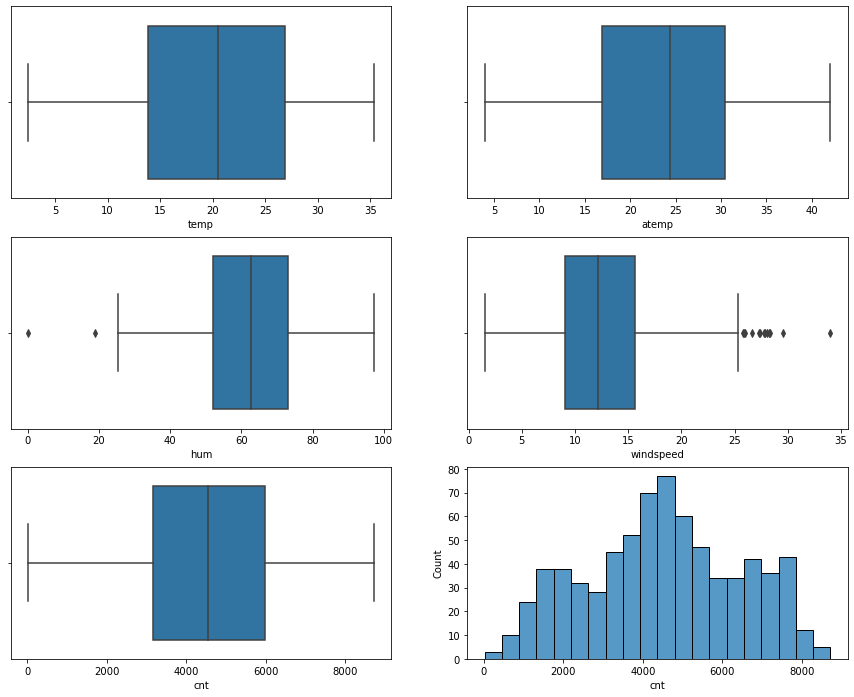

In [16]:
# Plotting box plot for numerical variables.
fig,axs=plt.subplots(3,2)
fig.set_figheight(12)
fig.set_figwidth(15)

sns.boxplot(data=df, x="temp",ax=axs[0,0])
sns.boxplot(data=df, x="atemp",ax=axs[0,1])
sns.boxplot(data=df, x="hum",ax=axs[1,0])
sns.boxplot(data=df, x="windspeed",ax=axs[1,1])
sns.boxplot(data=df, x="cnt",ax=axs[2,0])
sns.histplot(data=df, x="cnt",ax=axs[2,1],bins=20)

plt.show()

##### Observations:

1. Humidity clearly shows some outliers present in the data. Windspeed also show some outliers.
2. All other columns dont seem to have outliers.

Outliers are not treated for this analysis.

##### Categorical data:

In [17]:
# Creating list for categorical variables.
cat_vars = ["season", "yr", "mnth", "holiday","weekday", "workingday", "weathersit"]

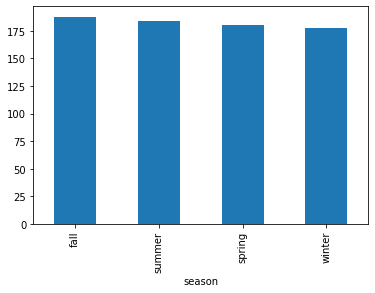

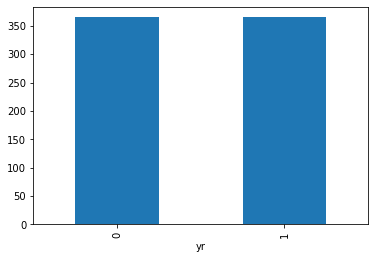

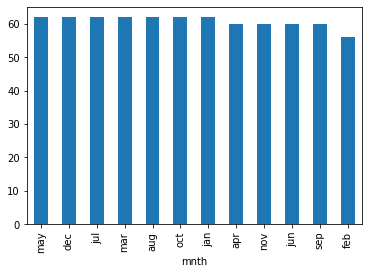

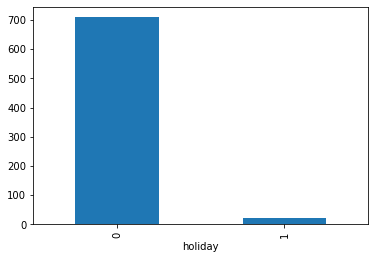

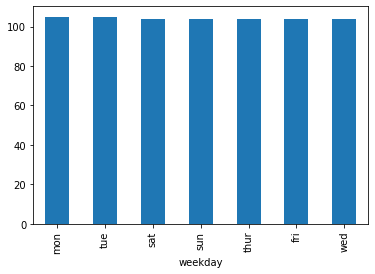

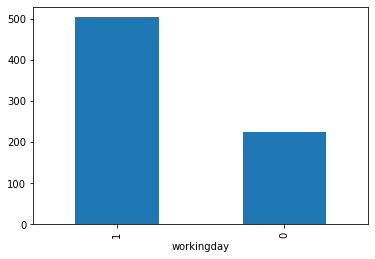

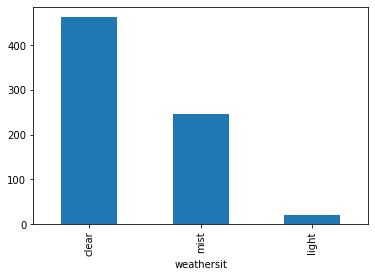

In [18]:
# Plotting count plot.
for cat in cat_vars:
    df[cat].value_counts().plot.bar()
    plt.xlabel(cat)
    plt.show()

##### Observations:
1. As this is complete two year data, columns like weekday,month,yr,season show equal count in all its categories.
2. Workingdays are more and holidays are less, as it is expected.
3. Mostly weather was clear, again it was as expected.

### Bi-variate analysis:

##### Numerical data:

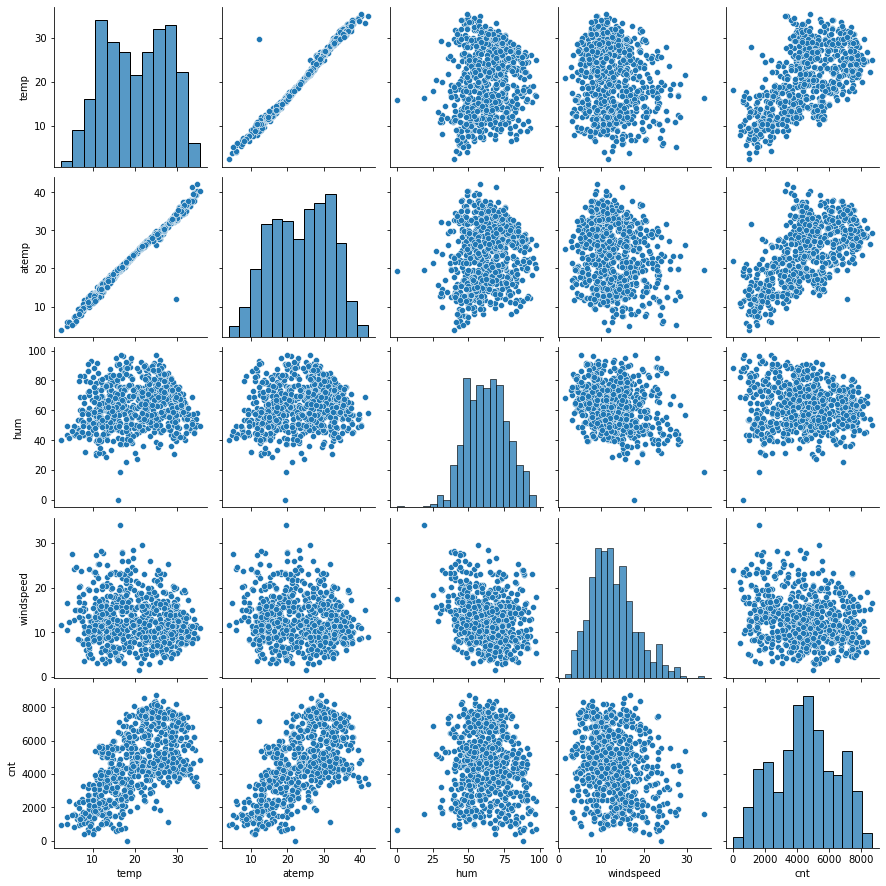

In [19]:
# Visualising numerical data using seaborn pair plot.
sns.pairplot(df[num_vars])
plt.show()

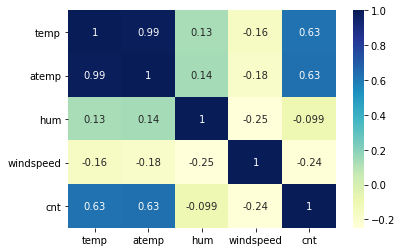

In [20]:
# Plotting correlation matrix between numerical variables
sns.heatmap(df[num_vars].corr(), annot=True, cmap ="YlGnBu")
plt.show()

##### Observations:
1. Temp and atemp have high correlation
2. Temp and atemp show high correlation with count of users.

##### Categorical data:

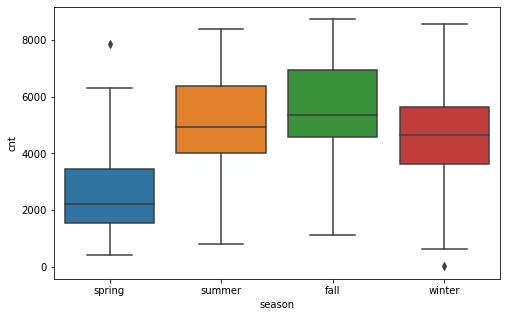

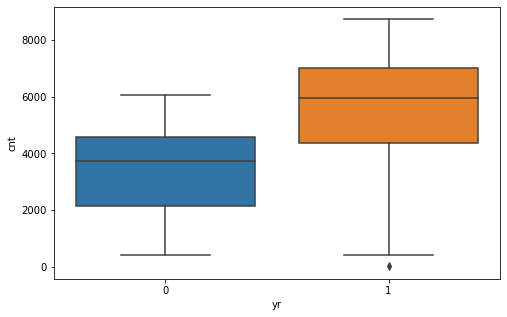

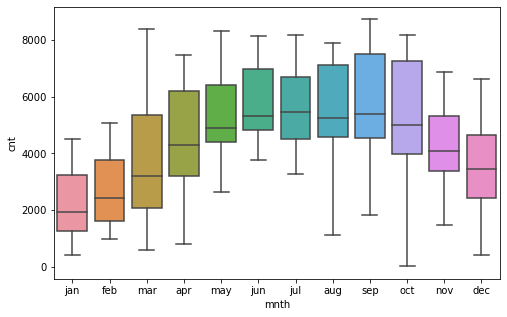

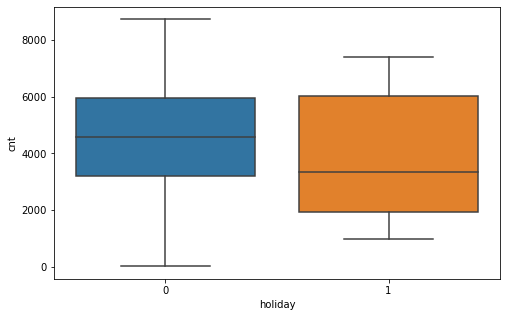

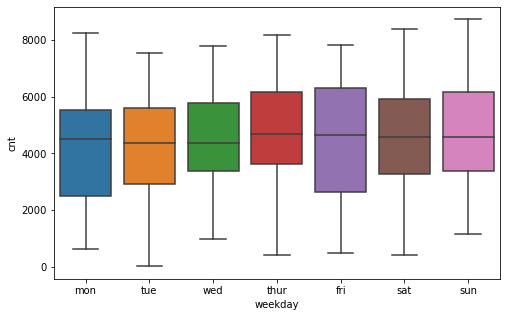

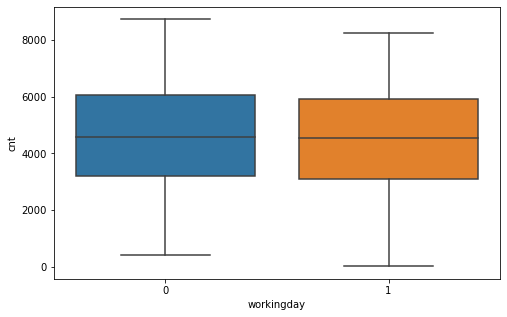

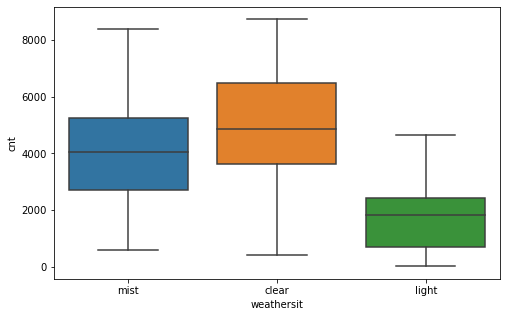

In [21]:
# Plotting box plots with respect to target variable cnt.
for var in cat_vars:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=var, y="cnt", data=df)
    plt.show()
    print()

##### Observations:
1. Count of users is high in fall and winter season
2. Count of users is increased in year 2019
3. Count of user is high between june to october months.
4. When there is no holiday count of users is on higher side, but on holiday distribution of count of users is widespread.
5. Median count of users remain same during every day of the week.
6. Working day does not seem to have effect on count of users.
7. Count of users is high during clear weather which is to be expected.

### Data preparation:

##### Creating dummy variables:

In [22]:
# Creating dummies
season = pd.get_dummies(df["season"], drop_first=True)
mnth = pd.get_dummies(df["mnth"], drop_first=True)
weekday = pd.get_dummies(df["weekday"], drop_first=True)
weathersit = pd.get_dummies(df["weathersit"], drop_first=True)

In [23]:
# Concatenating above created dfs in main df.
df = pd.concat([df, season, mnth, weekday, weathersit], axis=1)

In [24]:
# Dropping season, mnth, weekday, weathersit columns from data.
df.drop(["season","mnth","weekday","weathersit"], axis=1, inplace=True) 

In [25]:
# Checking data head again
pd.set_option("display.max_columns",35)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,light,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Checking shape of the data again
df.shape

(730, 30)

##### Data splitting into Training and Testing sets:

In [27]:
# Splitting the data into trian and test sets with 80:20 ratio.
df_train, df_test = train_test_split(df, train_size=0.8, random_state=300)

In [28]:
# Checking shape of train df and test df.
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


##### Rescaling the features:

In [29]:
# Creating scaler instance.
scaler = MinMaxScaler()

In [30]:
# Applying scaler to all numerical variable.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
# Checking head of df_tarin after min-max scaling.
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,light,mist
80,0,0,1,0.484201,0.474613,0.642245,0.485144,0.308445,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
425,1,0,0,0.372391,0.368552,0.675664,0.292273,0.364933,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
164,0,0,1,0.689888,0.672694,0.521422,0.588999,0.560170,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
300,0,0,0,0.343911,0.314694,0.602399,0.494040,0.428555,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
104,0,1,0,0.490530,0.476281,0.690231,0.486635,0.357110,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


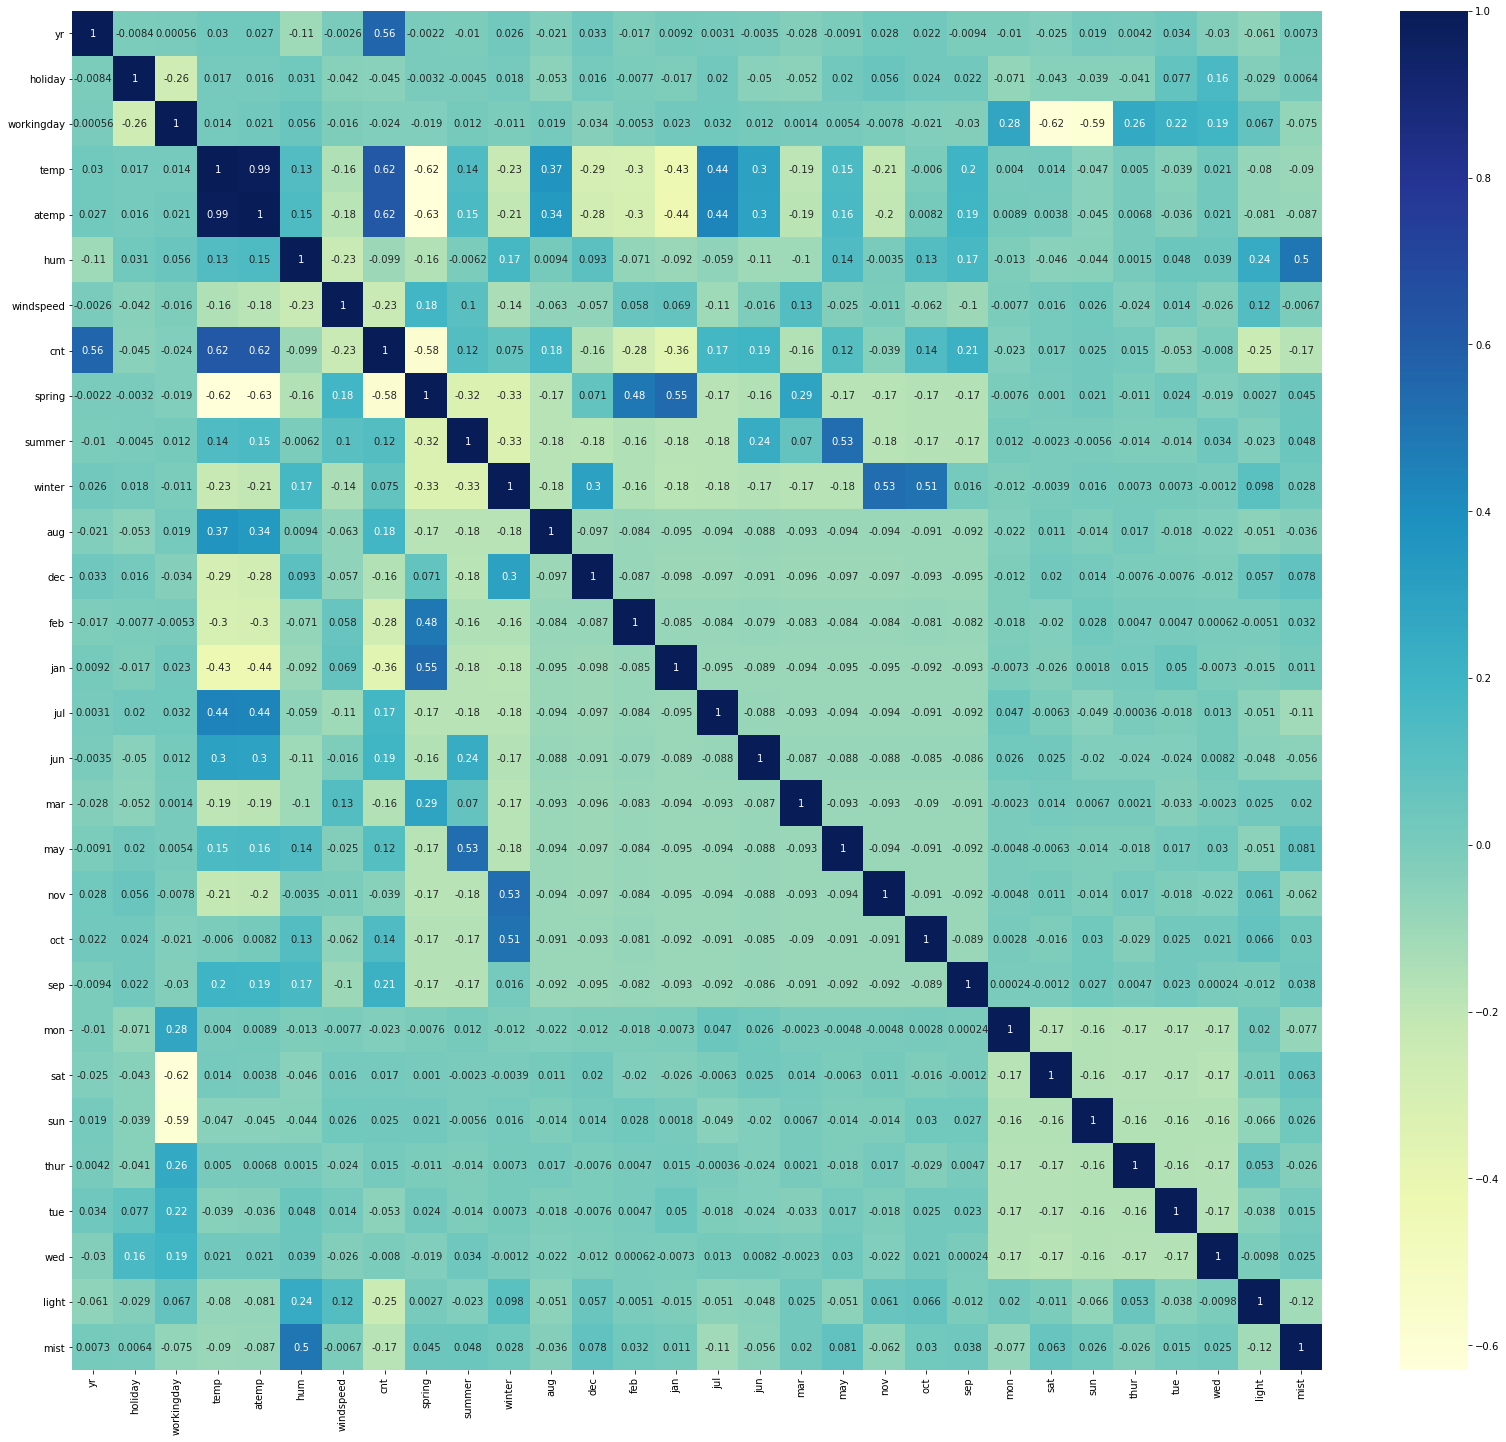

In [32]:
# Checking correlation between variables using heatmap
plt.figure(figsize=(28,25)) 
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Observations: 
1. Temperature , feeling temperature and year variables seem to show highest correlation with count of users variable.
2. Mist shows positive correlation with humidity.
3. November and october months show positive correlation with winter.
4. May month shows positive correlation with summer.
5. February and January months show positive correlation with spring.

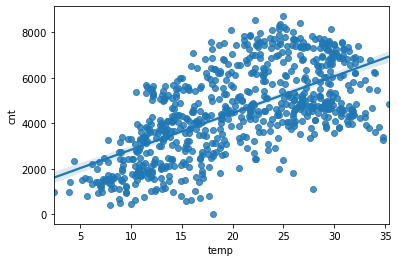

In [33]:
# Plotting scatterplot between temperature and count of users.
sns.regplot(x=df["temp"],y=df["cnt"])
plt.show()

##### Dividing X_train and y_train:

In [34]:
y_train = df_train.pop("cnt")
X_train = df_train

### Building model:

In [35]:
# Using RFE to reduce features to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

# Creating rfe and fitting on train set.
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
# Checking rfe ranking.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('aug', False, 14),
 ('dec', False, 2),
 ('feb', False, 6),
 ('jan', False, 4),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 10),
 ('may', False, 5),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 15),
 ('tue', False, 7),
 ('wed', False, 12),
 ('light', True, 1),
 ('mist', False, 3)]

In [37]:
# Creating column list with rfe selected features
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'jul', 'nov', 'sep', 'sat', 'sun', 'light'],
      dtype='object')

In [38]:
# Creating function for vif checking.
def check_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [39]:
# Crearing train dataframe with rfe selected features.
X_train_new = X_train[cols]

In [40]:
# Checking head of new dataframe.
X_train_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,jul,nov,sep,sat,sun,light
80,0,0,1,0.484201,0.474613,0.642245,0.485144,0,0,0,0,0,0,0,0
425,1,0,0,0.372391,0.368552,0.675664,0.292273,1,0,0,0,0,1,0,0
164,0,0,1,0.689888,0.672694,0.521422,0.588999,0,0,0,0,0,0,0,0
300,0,0,0,0.343911,0.314694,0.602399,0.494040,0,1,0,0,0,0,1,0
104,0,1,0,0.490530,0.476281,0.690231,0.486635,0,0,0,0,0,0,1,0


##### Model 1: With all rfe selected variables

In [41]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating first fitted model.
model_1 = sm.OLS(y_train, X_train_lm).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     187.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.66e-208
Time:                        20:13:15   Log-Likelihood:                 572.48
No. Observations:                 584   AIC:                            -1113.
Df Residuals:                     568   BIC:                            -1043.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4914      0.077      6.381      0.000       0.340       0.643
yr             0.2268      0.008     29.362      0.000       0.212       0.242
holiday       -0.1418      0.066     -2.150      0.032      -0.271      -0.012
workingday    -0.0853      0.070     -1.213      0.226      -0.223       0.053
temp           0.3229      0.125      2.594      0.010       0.078       0.567
atemp          0.1534      0.133      1.150      0.250      -0.108       0.415
hum           -0.2815      0.029     -9.633      0.000      -0.339      -0.224
windspeed     -0.1425      0.022     -6.413      0.000      -0.186      -0.099
spring        -0.1304      0.015     -8.864      0.000      -0.159      -0.102
winter         0.0656      0.013      5.152      0.000       0.041       0.091
jul           -0.0725      0.016     -4.580      0.000      -0.104      -0.041
nov           -0.0427      0.017     -2.576      0.010      -0.075      -0.010
sep            0.0640      0.015      4.364      0.000       0.035       0.093
sat           -0.0724      0.070     -1.032      0.302      -0.210       0.065
sun           -0.0701      0.070     -0.998      0.318      -0.208       0.068
light         -0.1723      0.025     -6.947      0.000      -0.221      -0.124
==============================================================================
Omnibus:                       72.279   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.565
Skew:                          -0.799   Prob(JB):                     2.96e-26
Kurtosis:                       4.509   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking VIF of all variables
vif_1 = check_vif(X_train_new)
vif_1

,Features,VIF
4,atemp,383.39
3,temp,379.51
2,workingday,33.98
5,hum,24.09
12,sat,7.79
13,sun,7.20
6,windspeed,6.60
7,spring,3.39
8,winter,2.70
1,holiday,2.15


Sun has high p-value greater than 0.05 as well as vif value greater than 5. Hence dropping sun variable from model.

##### Model 2 : 

In [43]:
X_train_new.drop("sun", axis=1, inplace=True)

In [44]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating second fitted model.
model_2 = sm.OLS(y_train, X_train_lm).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     200.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.89e-209
Time:                        20:13:15   Log-Likelihood:                 571.97
No. Observations:                 584   AIC:                            -1114.
Df Residuals:                     569   BIC:                            -1048.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4208      0.030     13.801      0.000       0.361       0.481
yr             0.2272      0.008     29.461      0.000       0.212       0.242
holiday       -0.0807      0.025     -3.292      0.001      -0.129      -0.033
workingday    -0.0160      0.011     -1.405      0.161      -0.038       0.006
temp           0.3279      0.124      2.636      0.009       0.084       0.572
atemp          0.1494      0.133      1.121      0.263      -0.112       0.411
hum           -0.2812      0.029     -9.621      0.000      -0.339      -0.224
windspeed     -0.1429      0.022     -6.430      0.000      -0.187      -0.099
spring        -0.1295      0.015     -8.820      0.000      -0.158      -0.101
winter         0.0660      0.013      5.192      0.000       0.041       0.091
jul           -0.0723      0.016     -4.570      0.000      -0.103      -0.041
nov           -0.0435      0.017     -2.629      0.009      -0.076      -0.011
sep            0.0642      0.015      4.380      0.000       0.035       0.093
sat           -0.0038      0.014     -0.268      0.789      -0.032       0.024
light         -0.1720      0.025     -6.937      0.000      -0.221      -0.123
==============================================================================
Omnibus:                       71.880   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.175
Skew:                          -0.798   Prob(JB):                     5.93e-26
Kurtosis:                       4.492   Cond. No.                         83.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Checking VIF:
vif_2 = check_vif(X_train_new)
vif_2

,Features,VIF
4,atemp,380.42
3,temp,379.28
5,hum,17.06
2,workingday,5.65
6,windspeed,5.26
7,spring,2.68
8,winter,2.51
0,yr,1.98
12,sat,1.96
10,nov,1.59


Sat has high p-value of 0.789, hence dropping from the model.

##### Model 3 :

In [46]:
X_train_new.drop("sat", axis=1, inplace=True)

In [47]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating third fitted model.
model_3 = sm.OLS(y_train, X_train_lm).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.30e-210
Time:                        20:13:15   Log-Likelihood:                 571.93
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     570   BIC:                            -1055.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4188      0.030     14.180      0.000       0.361       0.477
yr             0.2273      0.008     29.516      0.000       0.212       0.242
holiday       -0.0789      0.024     -3.348      0.001      -0.125      -0.033
workingday    -0.0140      0.009     -1.631      0.103      -0.031       0.003
temp           0.3259      0.124      2.627      0.009       0.082       0.570
atemp          0.1513      0.133      1.138      0.256      -0.110       0.412
hum           -0.2811      0.029     -9.627      0.000      -0.338      -0.224
windspeed     -0.1428      0.022     -6.432      0.000      -0.186      -0.099
spring        -0.1296      0.015     -8.831      0.000      -0.158      -0.101
winter         0.0660      0.013      5.198      0.000       0.041       0.091
jul           -0.0724      0.016     -4.574      0.000      -0.103      -0.041
nov           -0.0437      0.017     -2.643      0.008      -0.076      -0.011
sep            0.0643      0.015      4.392      0.000       0.036       0.093
light         -0.1723      0.025     -6.959      0.000      -0.221      -0.124
==============================================================================
Omnibus:                       71.374   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.160
Skew:                          -0.794   Prob(JB):                     9.85e-26
Kurtosis:                       4.487   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking vif:
vif_3 = check_vif(X_train_new)
vif_3

,Features,VIF
4,atemp,380.05
3,temp,377.36
5,hum,16.60
6,windspeed,5.19
2,workingday,3.40
7,spring,2.60
8,winter,2.50
0,yr,1.98
10,nov,1.58
9,jul,1.47


Atemp has high p-value as well as high vif value. Droping from the model.

##### Model 4 : 

In [49]:
X_train_new.drop("atemp", axis=1, inplace=True)

In [50]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating fourth fitted model.
model_4 = sm.OLS(y_train, X_train_lm).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     234.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.59e-211
Time:                        20:13:15   Log-Likelihood:                 571.27
No. Observations:                 584   AIC:                            -1117.
Df Residuals:                     571   BIC:                            -1060.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4213      0.029     14.298      0.000       0.363       0.479
yr             0.2272      0.008     29.497      0.000       0.212       0.242
holiday       -0.0790      0.024     -3.351      0.001      -0.125      -0.033
workingday    -0.0136      0.009     -1.581      0.114      -0.030       0.003
temp           0.4632      0.029     16.073      0.000       0.407       0.520
hum           -0.2786      0.029     -9.566      0.000      -0.336      -0.221
windspeed     -0.1465      0.022     -6.675      0.000      -0.190      -0.103
spring        -0.1304      0.015     -8.894      0.000      -0.159      -0.102
winter         0.0667      0.013      5.258      0.000       0.042       0.092
jul           -0.0722      0.016     -4.563      0.000      -0.103      -0.041
nov           -0.0441      0.017     -2.669      0.008      -0.077      -0.012
sep            0.0635      0.015      4.341      0.000       0.035       0.092
light         -0.1730      0.025     -6.989      0.000      -0.222      -0.124
==============================================================================
Omnibus:                       69.584   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.989
Skew:                          -0.782   Prob(JB):                     7.92e-25
Kurtosis:                       4.454   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Checking vif:
vif_4 = check_vif(X_train_new)
vif_4

,Features,VIF
4,hum,16.24
3,temp,13.86
5,windspeed,5.11
2,workingday,3.39
6,spring,2.60
7,winter,2.48
0,yr,1.98
9,nov,1.58
8,jul,1.47
10,sep,1.21


Workingday has p-value greater than 0.05, hence dropping from the model.

##### Model 5 : 

In [52]:
X_train_new.drop("workingday", axis=1, inplace=True)

In [53]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating fifth fitted model.
model_5 = sm.OLS(y_train, X_train_lm).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     254.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.36e-212
Time:                        20:13:15   Log-Likelihood:                 569.99
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     572   BIC:                            -1064.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4124      0.029     14.238      0.000       0.356       0.469
yr             0.2271      0.008     29.445      0.000       0.212       0.242
holiday       -0.0693      0.023     -3.040      0.002      -0.114      -0.025
temp           0.4639      0.029     16.078      0.000       0.407       0.521
hum           -0.2811      0.029     -9.656      0.000      -0.338      -0.224
windspeed     -0.1458      0.022     -6.634      0.000      -0.189      -0.103
spring        -0.1299      0.015     -8.852      0.000      -0.159      -0.101
winter         0.0674      0.013      5.302      0.000       0.042       0.092
jul           -0.0731      0.016     -4.613      0.000      -0.104      -0.042
nov           -0.0445      0.017     -2.687      0.007      -0.077      -0.012
sep            0.0642      0.015      4.384      0.000       0.035       0.093
light         -0.1749      0.025     -7.066      0.000      -0.224      -0.126
==============================================================================
Omnibus:                       65.470   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.337
Skew:                          -0.748   Prob(JB):                     3.64e-23
Kurtosis:                       4.418   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking vif:
vif_5 = check_vif(X_train_new)
vif_5

,Features,VIF
3,hum,15.49
2,temp,13.68
4,windspeed,5.07
5,spring,2.58
6,winter,2.48
0,yr,1.98
8,nov,1.58
7,jul,1.47
9,sep,1.21
10,light,1.12


Hum has high vif value of 15.49, removing hum from our model.

##### Model 6 : 

In [55]:
X_train_new.drop("hum", axis=1, inplace=True)

In [56]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating fifth fitted model.
model_6 = sm.OLS(y_train, X_train_lm).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.05e-194
Time:                        20:13:15   Log-Likelihood:                 525.90
No. Observations:                 584   AIC:                            -1030.
Df Residuals:                     573   BIC:                            -981.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.024      9.755      0.000       0.190       0.286
yr             0.2353      0.008     28.489      0.000       0.219       0.251
holiday       -0.0754      0.025     -3.074      0.002      -0.124      -0.027
temp           0.4228      0.031     13.751      0.000       0.362       0.483
windspeed     -0.0976      0.023     -4.230      0.000      -0.143      -0.052
spring        -0.1368      0.016     -8.663      0.000      -0.168      -0.106
winter         0.0472      0.014      3.497      0.001       0.021       0.074
jul           -0.0552      0.017     -3.259      0.001      -0.089      -0.022
nov           -0.0335      0.018     -1.884      0.060      -0.068       0.001
sep            0.0505      0.016      3.216      0.001       0.020       0.081
light         -0.2416      0.026     -9.432      0.000      -0.292      -0.191
==============================================================================
Omnibus:                       68.697   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.764
Skew:                          -0.799   Prob(JB):                     2.94e-23
Kurtosis:                       4.308   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Checking vif:
vif_6 = check_vif(X_train_new)
vif_6

,Features,VIF
2,temp,5.14
3,windspeed,5.01
0,yr,1.98
5,winter,1.89
4,spring,1.73
7,nov,1.58
6,jul,1.41
8,sep,1.20
9,light,1.07
1,holiday,1.04


Nov has shown p-value greater than 0.05. Droping it from our model.

##### Model 7 : 

In [58]:
X_train_new.drop("nov", axis=1, inplace=True)

In [59]:
# Adding a constant.
X_train_lm = sm.add_constant(X_train_new)

# Creating fifth fitted model.
model_7 = sm.OLS(y_train, X_train_lm).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     257.8
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          3.70e-195
Time:                        20:13:15   Log-Likelihood:                 524.10
No. Observations:                 584   AIC:                            -1028.
Df Residuals:                     574   BIC:                            -984.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2325      0.024      9.577      0.000       0.185       0.280
yr             0.2348      0.008     28.385      0.000       0.219       0.251
holiday       -0.0785      0.025     -3.198      0.001      -0.127      -0.030
temp           0.4323      0.030     14.215      0.000       0.373       0.492
windspeed     -0.0999      0.023     -4.330      0.000      -0.145      -0.055
spring        -0.1326      0.016     -8.463      0.000      -0.163      -0.102
winter         0.0379      0.013      3.009      0.003       0.013       0.063
jul           -0.0569      0.017     -3.355      0.001      -0.090      -0.024
sep            0.0531      0.016      3.388      0.001       0.022       0.084
light         -0.2416      0.026     -9.410      0.000      -0.292      -0.191
==============================================================================
Omnibus:                       65.038   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.608
Skew:                          -0.771   Prob(JB):                     1.05e-21
Kurtosis:                       4.262   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Checking vif:
vif_7 = check_vif(X_train_new)
vif_7

,Features,VIF
2,temp,5.07
3,windspeed,4.93
0,yr,1.98
4,spring,1.72
6,jul,1.41
5,winter,1.37
7,sep,1.19
8,light,1.07
1,holiday,1.03


All p-values and vif values are within acceptable range. 
Taking Model 7 as final model.

### Residual analysis of the train data:

In [61]:
# Predicting y_train 
y_train_pred = model_7.predict(X_train_lm)

In [62]:
# Calculating error terms
error_terms = y_train-y_train_pred

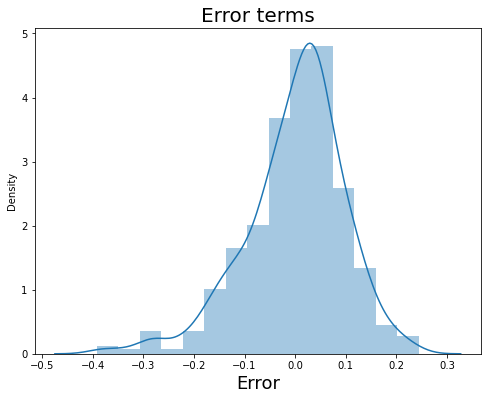

In [63]:
# Plotting histogram of error terms
plt.figure(figsize=(8,6))
sns.distplot(error_terms, bins=15)
plt.title("Error terms", fontsize=20)
plt.xlabel("Error", fontsize=18)
plt.show()

##### Observation:
Error terms seems to be normally distributed.

### Making Predictions Using the Final Model:

##### Applying the scaling on the test sets:

In [64]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [65]:
# checking head of the test data after scaling
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thur,tue,wed,light,mist
146,0,0,0,0.787985,0.732369,0.672237,0.520759,0.535780,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
263,0,0,1,0.678285,0.618859,0.925450,0.176569,0.498159,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.449393,0.438975,0.638817,0.330861,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
552,1,0,0,1.015822,0.952767,0.505998,0.336765,0.554303,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
302,0,0,1,0.329145,0.317998,0.641388,0.367929,0.380695,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


##### Dividing into X_test and y_test:

In [66]:
y_test = df_test.pop("cnt")
X_test = df_test

##### Making predictions for y_test:

In [67]:
# Dropping variable that are not there in final model from X_test dataframe
X_test_new = X_test[X_train_new.columns]

In [68]:
# Adding constant variable to X_test_new
X_test_new = sm.add_constant(X_test_new)

In [69]:
# Checking first five rows
X_test_new.head()

,const,yr,holiday,temp,windspeed,spring,winter,jul,sep,light
146,1.0,0,0,0.787985,0.520759,0,0,0,0,0
263,1.0,0,0,0.678285,0.176569,0,0,0,1,0
426,1.0,1,0,0.449393,0.330861,1,0,0,0,0
552,1.0,1,0,1.015822,0.336765,0,0,1,0,0
302,1.0,0,0,0.329145,0.367929,0,1,0,0,0


In [70]:
# Making predictions
y_test_pred = model_7.predict(X_test_new)

### Model evaluation:

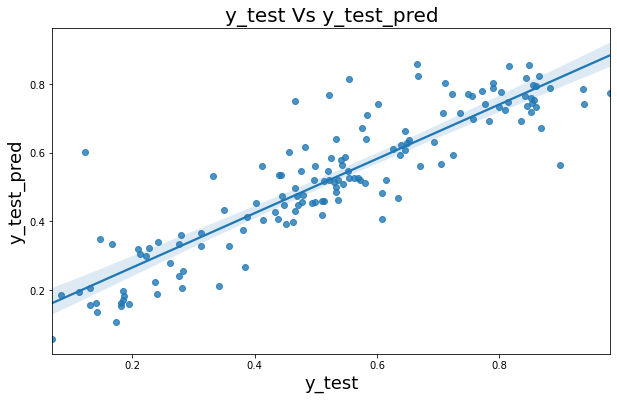

In [71]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(10,6))
sns.regplot(y_test,y_test_pred)
plt.title("y_test Vs y_test_pred", fontsize=20)
plt.xlabel("y_test", fontsize=18)
plt.ylabel("y_test_pred", fontsize=18)
plt.show()

##### Observation:
We can obsereve that values are randomly distributed. It does not show any pattern.

##### r2_score of test set:

In [72]:
# Checking r2 score on test set.
r_squared = r2_score(y_test, y_test_pred)
round(r_squared,3)

0.796

In [73]:
# Checking adjusted r2
n = X_test.shape[0]
p = X_test[X_train_new.columns].shape[1]
adj_r2 = 1-(((1-r_squared)*(n-1))/(n-p-1))
round(adj_r2,3)

0.783

##### Result comparison:

1. r2 value for train data: 0.802

2. adj-r2 value for train data: 0.799

3. r2 value for test data: 0.796

4. adj-r2 value for test data: 0.783

r2 and adj-r2 values of test data set are close to those of train data set

##### Equation for Best fitted line:

In [74]:
coeff = model_7.params
round(coeff,3)

const        0.233
yr           0.235
holiday     -0.078
temp         0.432
windspeed   -0.100
spring      -0.133
winter       0.038
jul         -0.057
sep          0.053
light       -0.242
dtype: float64

We can see that the equation of our best fitted line is:

$cnt = 0.235×yr - 0.078×holiday + 0.432×temp - 0.100×windspeed - 0.133×spring + 0.038×winter - 0.057×jul + 0.053×sep - 0.242×light + 0.233×const$

#### Conclusion:

1. Bike demand is positively affected by year, temperature, winter season, september month.
   Bike demand increased by 0.235 per unit increase in year.
   Bike demand increased by 0.432 per unit increase in temperature.
   Bike demand increased by 0.038 in winter season.
   Bike demands increased by 0.053 in september month.
   
2. Bike demand is negatively affected by holiday, windspeed, spring season, july month, light rain/snow.
   Bike demand decreased by 0.078 when it is holiday.
   Bike demand decreased by 0.100 when windspeed increases by per unit.
   Bike demand decreased by 0.133 in spring season.
   Bike demand decreased by 0.057 in july month.
   Bike demand decreased by 0.242 when there is light rain/snow.